# **Proyek Akhir : Membuat Model Sistem Rekomendasi**

**Nama : Iqbal Tio Ardiansyah**

**Group : M06**

**Memasang kaggle di collab**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iqbaltio","key":"62bfdc8b7a1bc37641f5fc074bc98d72"}'}

**Memberi hak akses pada folder**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


**Mengunduh data dan unzip data**

**Dataset didapat dari link berikut : https://www.kaggle.com/datasets/satpreetmakhija/netflix-movies-and-tv-shows-2021**

In [ ]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows -p /content/sample_data/ --unzip

  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 50.4MB/s]


**Mengimport library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np 
import string
import matplotlib.pyplot as plt

import seaborn as sns
import re
import textwrap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras

**Melihat isi dari data yang sudah kita download**

In [ ]:
movieData = pd.read_csv('/content/sample_data/imdb_top_1000.csv')
movieData

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
movieData.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [ ]:
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


**Melihat missing values pada data**

In [ ]:
pd.DataFrame({'Total missing values':movieData.isna().sum()})

,Total missing values
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


**Menghapus variabel yang tak digunakan**

In [ ]:
movieData = movieData.drop(['Poster_Link','Released_Year', 'Runtime', 'Overview', 
                            'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'], axis=1)
movieData.head()

,Series_Title,Certificate,Genre,IMDB_Rating,Meta_score,Director
0,The Shawshank Redemption,A,Drama,9.3,80.0,Frank Darabont
1,The Godfather,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola
2,The Dark Knight,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan
3,The Godfather: Part II,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola
4,12 Angry Men,U,"Crime, Drama",9.0,96.0,Sidney Lumet


In [ ]:
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series_Title  1000 non-null   object 
 1   Certificate   899 non-null    object 
 2   Genre         1000 non-null   object 
 3   IMDB_Rating   1000 non-null   float64
 4   Meta_score    843 non-null    float64
 5   Director      1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


**Keterangan :**

- Series_title : Judul dari film
- Certificate  : Rating umur dari film
- Genre        : Genre film
- IMDB_Rating  : Rating dari situs IMDB
- Meta_score   : Skor yang didapat dari kepuasan penonton
- Director     : Direktor dari film

**Melihat missing value dari data baru kita**

In [ ]:
pd.DataFrame({'Total missing values':movieData.isna().sum()})

,Total missing values
Series_Title,0
Certificate,101
Genre,0
IMDB_Rating,0
Meta_score,157
Director,0


**Menghapus data missing value**

In [ ]:
movieData = movieData.dropna(subset=['Certificate', 'Meta_score'])
movieData.head()

,Series_Title,Certificate,Genre,IMDB_Rating,Meta_score,Director
0,The Shawshank Redemption,A,Drama,9.3,80.0,Frank Darabont
1,The Godfather,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola
2,The Dark Knight,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan
3,The Godfather: Part II,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola
4,12 Angry Men,U,"Crime, Drama",9.0,96.0,Sidney Lumet


In [ ]:
pd.DataFrame({'Total missing values':movieData.isna().sum()})

,Total missing values
Series_Title,0
Certificate,0
Genre,0
IMDB_Rating,0
Meta_score,0
Director,0


In [ ]:
movieData.shape

(787, 6)

**Univariate Data Analysis**

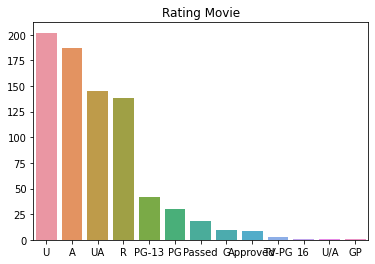

In [ ]:
movieRating = movieData['Certificate'].value_counts()
sns.barplot(y=movieRating.values,
            x=movieRating.index,).set_title("Rating Movie")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


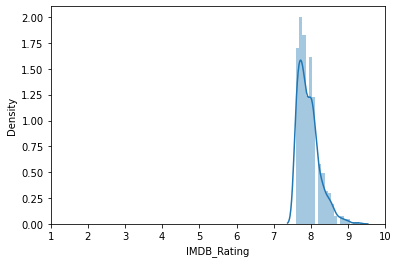

In [ ]:
fig, ax = plt.subplots()
sns.distplot(movieData['IMDB_Rating'], ax = ax)
ax.set_xlim(1, 10)
plt.show()

In [ ]:
movie_director_count=movieData['Director'].value_counts().sort_values(ascending=False)
movie_director_count=pd.DataFrame(movie_director_count)
topDirector=movie_director_count[1:11]
topDirector

,Director
Alfred Hitchcock,11
Hayao Miyazaki,11
Martin Scorsese,10
Stanley Kubrick,9
Christopher Nolan,8
Clint Eastwood,8
Woody Allen,8
Quentin Tarantino,8
David Fincher,8
Rob Reiner,7


**Multivariate Analysis**

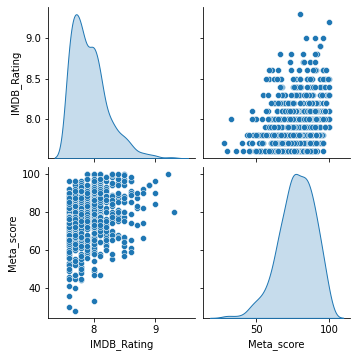

In [ ]:
sns.pairplot(movieData, diag_kind = 'kde')

**Text cleaning**

In [ ]:
movieData['Series_Title'].unique()[5:15]

array(['The Lord of the Rings: The Return of the King', 'Pulp Fiction',
       "Schindler's List", 'Inception', 'Fight Club',
       'The Lord of the Rings: The Fellowship of the Ring',
       'Forrest Gump', 'Il buono, il brutto, il cattivo',
       'The Lord of the Rings: The Two Towers', 'The Matrix'],
      dtype=object)

In [ ]:
replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}

strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

puncts = ['!', '?', '$', '&', '/', '%', '#', '*','£']

In [ ]:
def textCleaning(x):
    x = str(x)
    x = x.lower()
    x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", x)
    for k, v in replace_puncts.items():
        x = x.replace(k, f' {v} ')
        
    for punct in strip_chars:
        x = x.replace(punct, ' ') 
    
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
        
    x = x.replace(" '", " ")
    x = x.replace("' ", " ")
    x = x.strip()

    return x

In [ ]:
movieData['Series_Title'] = movieData['Series_Title'].apply(textCleaning)

In [ ]:
movieData['Series_Title'].unique()[0:15]

array(['the shawshank redemption', 'the godfather', 'the dark knight',
       'the godfather  part ii', '12 angry men',
       'the lord of the rings  the return of the king', 'pulp fiction',
       'schindler s list', 'inception', 'fight club',
       'the lord of the rings  the fellowship of the ring',
       'forrest gump', 'il buono  il brutto  il cattivo',
       'the lord of the rings  the two towers', 'the matrix'],
      dtype=object)

**Model Development dengan menggunakan Content Based Filtering**

Model yang saya gunakan pada kali ini adalah TF-ID Vectorizer

In [ ]:
movieName = movieData['Series_Title'].tolist()
movieGenre = movieData['Genre'].tolist()

print(len(movieName))
print(len(movieGenre))

787
787


In [ ]:
movieNewData = pd.DataFrame({
    'MovieName': movieName,
    'MovieGenre': movieGenre
})
movieNewData

,MovieName,MovieGenre
0,the shawshank redemption,Drama
1,the godfather,"Crime, Drama"
2,the dark knight,"Action, Crime, Drama"
3,the godfather part ii,"Crime, Drama"
4,12 angry men,"Crime, Drama"
...,...,...
782,blowup,"Drama, Mystery, Thriller"
783,a hard day s night,"Comedy, Music, Musical"
784,breakfast at tiffany s,"Comedy, Drama, Romance"
785,giant,"Drama, Western"


In [ ]:
data = movieNewData
data.sample(5)

,MovieName,MovieGenre
295,der himmel über berlin,"Drama, Fantasy, Romance"
703,moneyball,"Biography, Drama, Sport"
331,the wizard of oz,"Adventure, Family, Fantasy"
76,inglourious basterds,"Adventure, Drama, War"
52,kimi no na wa,"Animation, Drama, Fantasy"


In [ ]:
tf = TfidfVectorizer()
tf.fit(data['MovieGenre'])
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'fi',
 'film',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'sport',
 'thriller',
 'war',
 'western']

In [ ]:
tfidf_matrix = tf.fit_transform(data['MovieGenre'])
tfidf_matrix.shape

(787, 23)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.67076163, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.96089303],
        [0.        , 0.        , 0.        , ..., 0.        , 0.76562903,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.MovieName
).sample(22, axis=1).sample(10, axis=0)

,action,sci,film,thriller,sport,horror,fantasy,noir,history,music,...,family,fi,biography,adventure,comedy,western,romance,war,crime,drama
MovieName,,,,,,,,,,,,,,,,,,,,,
shaun of the dead,0.000000,0.000000,0.0,0.0,0.0,0.876245,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.481866,0.000000,0.00000,0.0,0.00000,0.000000
the graduate,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.595254,0.000000,0.73639,0.0,0.00000,0.321562
wonder,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.941919,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.335842
la vita bella,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.595254,0.000000,0.73639,0.0,0.00000,0.321562
nebraska,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.659713,0.661207,0.000000,0.00000,0.0,0.00000,0.357191
loving vincent,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.58735,0.000000,0.000000,0.000000,0.00000,0.0,0.49761,0.000000
true grit,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.960893,0.00000,0.0,0.00000,0.276920
the longest day,0.550702,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.786701,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.278976
magnolia,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,1.000000


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.45814796, 0.33979597, ..., 0.32156221, 0.27691982,
        0.25743067],
       [0.45814796, 1.        , 0.741673  , ..., 0.14732307, 0.12687025,
        0.11794134],
       [0.33979597, 0.741673  , 1.        , ..., 0.10926555, 0.09409624,
        0.0874739 ],
       ...,
       [0.32156221, 0.14732307, 0.10926555, ..., 1.        , 0.08904695,
        0.51690175],
       [0.27691982, 0.12687025, 0.09409624, ..., 0.08904695, 1.        ,
        0.07128765],
       [0.25743067, 0.11794134, 0.0874739 , ..., 0.51690175, 0.07128765,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['MovieName'], columns=data['MovieName'])
print('Shape:', cosine_sim_df.shape)

Shape: (787, 787)


In [ ]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

MovieName,un proph te,nebraska,2001 a space odyssey,kagemusha,donnie darko
MovieName,,,,,
300,0.207039,0.161416,0.000000,0.107119,0.098255
crimes and misdemeanors,0.217754,0.751518,0.000000,0.112663,0.103340
king kong,0.000000,0.227429,0.777964,0.000000,0.566560
gandhi,0.121595,0.094800,0.000000,0.563195,0.057705
the breakfast club,0.217754,0.751518,0.000000,0.112663,0.103340
fear and loathing in las vegas,0.163646,1.000000,0.292339,0.084668,0.077662
wall e,0.000000,0.291512,0.195810,0.000000,0.000000
hell or high water,0.741673,0.121372,0.000000,0.080545,0.073880
rushmore,0.147323,0.508445,0.000000,0.076223,0.069915


In [ ]:
def get_Movie_Recommendations(movieName, similarity_data=cosine_sim_df, items=data[['MovieName', 'MovieGenre']], k=10):
    index = similarity_data.loc[:,movieName].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movieName, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.MovieName.eq('big hero 6')]

,MovieName,MovieGenre
434,big hero 6,"Animation, Action, Adventure"


In [ ]:
get_Movie_Recommendations('big hero 6')

,MovieName,MovieGenre
0,kubo and the two strings,"Animation, Action, Adventure"
1,spider man into the spider verse,"Animation, Action, Adventure"
2,mononoke hime,"Animation, Action, Adventure"
3,incredibles 2,"Animation, Action, Adventure"
4,the iron giant,"Animation, Action, Adventure"
5,the incredibles,"Animation, Action, Adventure"
6,how to train your dragon,"Animation, Action, Adventure"
7,how to train your dragon 2,"Animation, Action, Adventure"
8,tangled,"Animation, Adventure, Comedy"
9,batman begins,"Action, Adventure"


In [ ]:
genre_recom = get_Movie_Recommendations('big hero 6')

In [ ]:
genre_exp = movieData[movieData['Series_Title'] == 'big hero 6']

In [ ]:
genre_exp

,Series_Title,Certificate,Genre,IMDB_Rating,Meta_score,Director
592,big hero 6,U,"Animation, Action, Adventure",7.8,74.0,Don Hall


In [ ]:
get_recom_genre=[]
for i in range(len(genre_exp.Genre)):
    for x in genre_exp.Genre.str.split(','):
        if x not in get_recom_genre:
            get_recom_genre.append(x)

**Melihat akurasi dari genre yang direkomendasikan**

In [ ]:
for i in get_recom_genre[0]:
  print(i + ": " + str((
      (genre_recom['MovieGenre'].str.contains(i).count()/genre_recom['MovieGenre'].count())*100)
  ))

Animation: 100.0
 Action: 100.0
 Adventure: 100.0


In [ ]:
get_Movie_Recommendations('casino royale')

,MovieName,MovieGenre
0,die hard with a vengeance,"Action, Adventure, Thriller"
1,goldfinger,"Action, Adventure, Thriller"
2,mission impossible fallout,"Action, Adventure, Thriller"
3,skyfall,"Action, Adventure, Thriller"
4,die hard,"Action, Thriller"
5,taken,"Action, Thriller"
6,serbuan maut,"Action, Thriller"
7,jaws,"Adventure, Thriller"
8,das boot,"Adventure, Drama, Thriller"
9,blood diamond,"Adventure, Drama, Thriller"


In [ ]:
get_Movie_Recommendations('jaws')

,MovieName,MovieGenre
0,blood diamond,"Adventure, Drama, Thriller"
1,deliverance,"Adventure, Drama, Thriller"
2,le salaire de la peur,"Adventure, Drama, Thriller"
3,das boot,"Adventure, Drama, Thriller"
4,mission impossible fallout,"Action, Adventure, Thriller"
5,goldfinger,"Action, Adventure, Thriller"
6,skyfall,"Action, Adventure, Thriller"
7,casino royale,"Action, Adventure, Thriller"
8,die hard with a vengeance,"Action, Adventure, Thriller"
9,north by northwest,"Adventure, Mystery, Thriller"
